<h1><center>EXPERIMENT 7</center></h1>

# AIM:- Implement GAN architecture on MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from keras.optimizers import Adam
from keras.datasets import mnist

In [2]:
# Load MNIST data
(X_train, _ ), (_, _) = mnist.load_data()

In [3]:
# Normalize data
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=3)

In [4]:
# Define generator
def build_generator():
    model = Sequential()
    model.add(Dense(7 * 7 * 128, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7, 7, 128)))
    model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(1, kernel_size=4, strides=2, padding='same', activation='tanh'))
    return model

In [5]:
# Define discriminator
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=(28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [6]:
# Compile discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

C:\Users\Asus\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
# Combine generator and discriminator into a single model
generator = build_generator()
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
gan = Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

In [8]:
# Train DCGAN
epochs = 1000
batch_size = 64
for epoch in range(epochs):
    # Select a random batch of images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_images = X_train[idx]

    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_images = generator.predict(noise)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_images, np.ones(batch_size))
    d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros(batch_size))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones(batch_size))

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} \t Discriminator Loss: {d_loss[0]} \t Generator Loss: {g_loss}")

2/2 [==============================] - 0s 8ms/step
Epoch: 0 	 Discriminator Loss: 0.689518392086029 	 Generator Loss: 0.690618634223938
2/2 [==============================] - 0s 4ms/step
Epoch: 100 	 Discriminator Loss: 0.1948639154434204 	 Generator Loss: 3.673219919204712
2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 8ms/step
Epoch: 200 	 Discriminator Loss: 0.1627204716205597 	 Generator Loss: 3.2188239097595215
2/2 [==============================] - 0s 4ms/step
Epoch: 300 	 Discriminator Loss: 0.41350653767585754 	 Generator Loss: 1.8890079259872437
2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 4ms/step
Epoch: 400 	 Discriminator Loss: 0.48381759226322174 	 Generator Loss: 1.8637405633926392
2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 8ms/step
Epoch: 500 	 Discriminator Loss: 0.5846172422170639 	 Generator Loss: 1.4663777351379395
2/2 [==============================] - 0s 8ms/step
Epoch: 600 	 Discriminator Loss: 0.5453859269618988 	 Generator Loss: 1.5674688816070557
2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 4ms/step
Epoch: 700 	 Discriminator Loss: 0.5149744749069214 	 Generator Loss: 1.7014141082763672
2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 4ms/step
Epoch: 800 	 Discriminator Loss: 0.5015283823013306 	 Generator Loss: 1.5874526500701904
2/2 [==============================] - 0s 4ms/step
Epoch: 900 	 Discriminator Loss: 0.6867323517799377 	 Generator Loss: 1.1935782432556152
2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 12ms/step


4/4 [==============================] - 0s 5ms/step


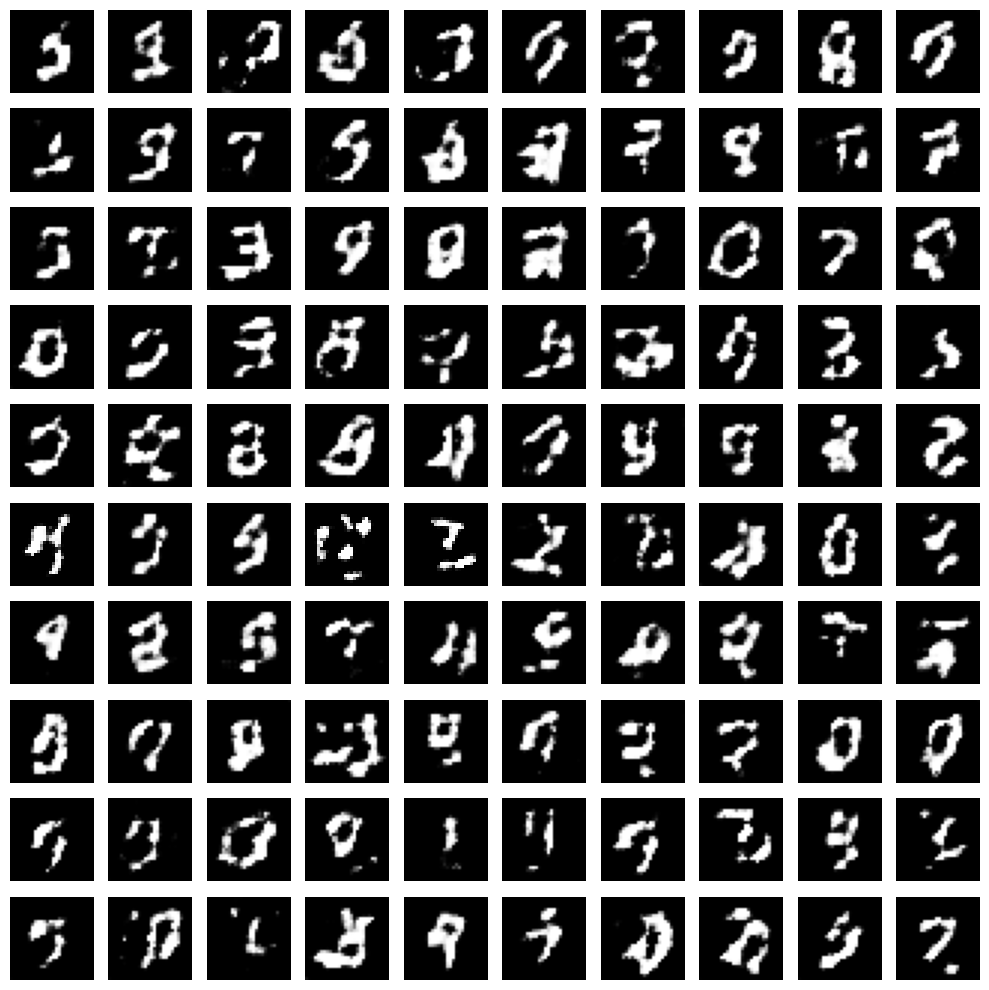

In [9]:
# Generate images
noise = np.random.normal(0, 1, (100, 100))
generated_images = generator.predict(noise)

# Display generated images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()